# Guided Project: Star Wars Survey

The data for this project was collected by the FiveThirtyEight team to answer the following question: "Does the rest of America realize that "The Empire Strikes Back" is clearly the best of the bunch?". We will use this dataset in our project.

## Overview

In [1]:
import pandas as pd
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')
print(star_wars.shape)
star_wars.head(10)

(1187, 38)


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Retur

Now we know the data structure, where every row (except the first one) represents one unique persons survey. The first row with missing `RespondentId` contains response type and extends the header. We can safely remove it and rename columns later.

In [3]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]
star_wars.shape

(1186, 38)

## Cleaning and Mapping Yes/No Columns

Some survey columns are represented by Yes/No questions. We will convert them to boolean type to make analysis more easier.

In [4]:
yes_no_dict = {
    'Have you seen any of the 6 films in the Star Wars franchise?': 'Seen',
    'Do you consider yourself to be a fan of the Star Wars film franchise?': 'Fan'
}
yes_no_cols = sorted(yes_no_dict.values(), reverse=True)
star_wars = star_wars.rename(columns=yes_no_dict)
star_wars[yes_no_cols].apply(pd.value_counts, dropna=False)

,Seen,Fan
Yes,936.0,552
No,250.0,284
NaN,NaN,350


In [5]:
for col in yes_no_cols:
    star_wars[col] = star_wars[col].map({'Yes': True, 'No': False})
star_wars[yes_no_cols].apply(pd.value_counts, dropna=False)

,Seen,Fan
False,250.0,284
True,936.0,552
NaN,NaN,350


## Cleaning and Mapping Checkbox Columns

Checkbox means one respondent could mark many answers. This leads us to keep all the columns.

In [6]:
seen_dict = {
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'Seen I',
    'Unnamed: 4': 'Seen II',
    'Unnamed: 5': 'Seen III',
    'Unnamed: 6': 'Seen IV',
    'Unnamed: 7': 'Seen V',
    'Unnamed: 8': 'Seen VI'
}
seen_cols = sorted(seen_dict.values())
star_wars = star_wars.rename(columns=seen_dict)
star_wars[seen_cols].apply(pd.value_counts, dropna=False).sort_index()

,Seen I,Seen II,Seen III,Seen IV,Seen V,Seen VI
Star Wars: Episode I The Phantom Menace,673.0,NaN,NaN,NaN,NaN,NaN
Star Wars: Episode II Attack of the Clones,NaN,571.0,NaN,NaN,NaN,NaN
Star Wars: Episode III Revenge of the Sith,NaN,NaN,550.0,NaN,NaN,NaN
Star Wars: Episode IV A New Hope,NaN,NaN,NaN,607.0,NaN,NaN
Star Wars: Episode V The Empire Strikes Back,NaN,NaN,NaN,NaN,758.0,NaN
Star Wars: Episode VI Return of the Jedi,NaN,NaN,NaN,NaN,NaN,738.0
NaN,513.0,615.0,636.0,579.0,428.0,448.0


As we can see, there are only two unique values in each column - the movie name and NaN. Again, we will easily convert it to boolean type.

In [7]:
star_wars[seen_cols] = star_wars[seen_cols].notnull()
star_wars[seen_cols].apply(pd.value_counts, dropna=False)

,Seen I,Seen II,Seen III,Seen IV,Seen V,Seen VI
False,513,615,636,579,428,448
True,673,571,550,607,758,738


## Cleaning the Ranking Columns

Same story goes fpr ranking columns, but instead of casting to boolean type we will use float.

In [8]:
rank_dict = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'Rank I',
    'Unnamed: 10': 'Rank II',
    'Unnamed: 11': 'Rank III',
    'Unnamed: 12': 'Rank IV',
    'Unnamed: 13': 'Rank V',
    'Unnamed: 14': 'Rank VI'
}
rank_cols = sorted(rank_dict.values())
star_wars = star_wars.rename(columns=rank_dict)
star_wars[rank_cols].apply(pd.value_counts, dropna=False).sort_index()

,Rank I,Rank II,Rank III,Rank IV,Rank V,Rank VI
1,129,32,36,204,289,146
2,71,116,47,135,235,232
3,130,103,150,127,106,220
4,237,183,182,130,47,57
5,100,300,203,79,118,36
6,168,102,217,161,41,145
NaN,351,350,351,350,350,350


In [9]:
star_wars[rank_cols] = star_wars[rank_cols].astype(float)
star_wars[rank_cols].apply(pd.value_counts, dropna=False).sort_index()

,Rank I,Rank II,Rank III,Rank IV,Rank V,Rank VI
1.0,129,32,36,204,289,146
2.0,71,116,47,135,235,232
3.0,130,103,150,127,106,220
4.0,237,183,182,130,47,57
5.0,100,300,203,79,118,36
6.0,168,102,217,161,41,145
NaN,351,350,351,350,350,350


## Finding the Highest-Ranked and Most Viewed Movie

In [10]:
star_wars[rank_cols] = (star_wars[rank_cols] - 7).abs() # Invert rating so higher value becomes most favourite

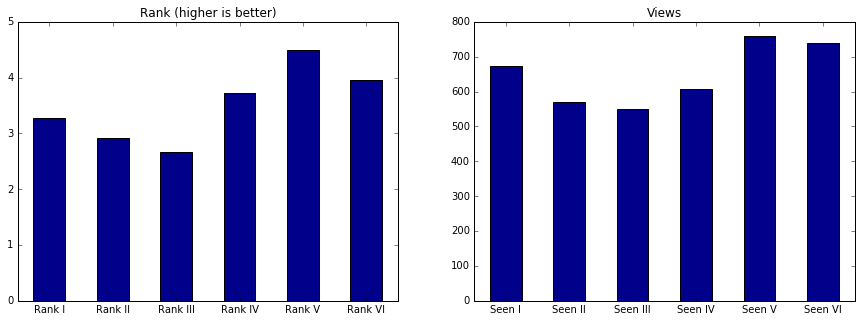

In [11]:
fig, _ = plt.subplots(1, 2, figsize=(15,5))
star_wars[rank_cols].mean().plot(kind='bar', rot=0, ylim=(0,5), title='Rank (higher is better)', color='darkblue', ax=fig.axes[0])
star_wars[seen_cols].sum().plot(kind='bar', rot=0, title='Views', color='darkblue', ax=fig.axes[1])

Original Star Wars Trilogy (movies IV, V and VI) rated highly than the new one. Rank also correlates with number of views as original movies seem to be a bit more popular.
* The most popular movie out of both trilogies is: `Star Wars: Episode V - The Empire Strikes Back (1980)`
* The less ranked and watched movie out of both trilogies is: `
Star Wars: Episode III – Revenge of the Sith (2005)`

## Exploring the Data by Binary Segments

In [12]:
star_wars_male = star_wars[star_wars['Gender'] == 'Male']
star_wars_female = star_wars[star_wars['Gender'] == 'Female']

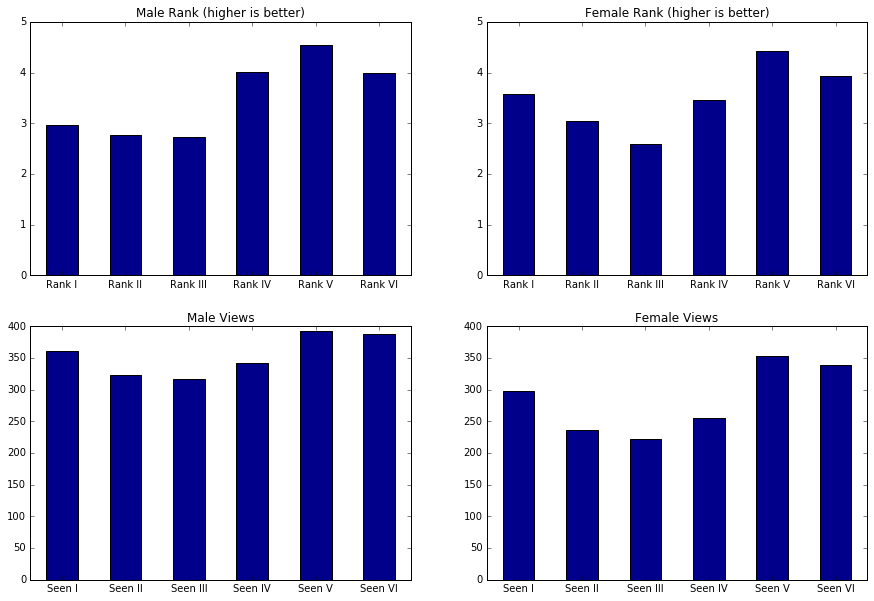

In [13]:
fig, _ = plt.subplots(2, 2, figsize=(15,10))
star_wars_male[rank_cols].mean().plot(kind='bar', rot=0, ylim=(0,5), title='Male Rank (higher is better)', color='darkblue', ax=fig.axes[0])
star_wars_female[rank_cols].mean().plot(kind='bar', rot=0, ylim=(0,5), title='Female Rank (higher is better)', color='darkblue', ax=fig.axes[1])
star_wars_male[seen_cols].sum().plot(kind='bar', rot=0, title='Male Views', color='darkblue', ax=fig.axes[2])
star_wars_female[seen_cols].sum().plot(kind='bar', rot=0, title='Female Views', color='darkblue', ax=fig.axes[3])

Females ranked movies I and II higher than males, but males liked movie IV more than females. Also we can see that female views have a large gap for first four movies.